In [2]:
import numpy as np
import matplotlib.pyplot as plt

## NS248 Lecture 5 – Regression

Suggested reading:  Book ch. 13, 14
There are also many descriptions of these methods online.


1. General principles of model building
    1. Goal: describe data with the simplest possible model
    2. Questions
        1. Which model do you use?
        2. How do you determine how well it describes the data?
        3. How do you avoid overfitting?  
        
     
2. Specific case for regression: one output variable, one or more input variables: 
$ y = f(\vec{X}) $



### Descriptions of relationships between a single x and a single y:
1. Covariance 
    
    1. Similar to variance, but for two variables:  

        $ cov(X,Y) = E[(X - \mu_{x})(Y - \mu_{y})]\\
                  = \Large{
                        \frac{\sum_{i=1}^n ((x_{i} - \bar{x})((y_{i} - \bar{y}))}{n}
                        } $  
      <br>
      

2. Correlation  

$$ \rho = {\frac{cov(X,Y)}{\sigma_{x}\sigma_{y}}} $$
        
For sampled data: <br> 

$$ r(X,Y)  = \Large{
                        \frac{\sum_{i=1}^n ((x_{i} - \bar{x})(y_{i} - \bar{y}))}
                             {\sqrt{
                                    \sum_{i=1}^n (x_{i} - \bar{x})^2(y_{i} - \bar{y})^2
                                   }
                              }
} $$
                          




Assumptions:
- p-value assumes normally distributed x and y data.
         
scipy.stats.pearsonr  

Alternative for rank / non-normal data: Spearman's rho
- Compares relative ordering of x and y
- Does not consider magnitude of individual samples

scipy.stats.spearmanr

### Linear Regression:
  
General form: 
<br>
    $$ y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... +  \beta_{n}x_{n} $$
    or  
    $$ y = \beta X $$
>    $ y $ is the dependent variable (the variable being predicted)  
>   $ \beta_{i} $ is the intercept for $i=0$ and the slope for $i > 0$ (also knows as the regression coefficients)  
>    $ x_{i} $ is the i-th independent variable  
    

#### Fitting procedure:  
- Find set of $ {\beta_{i}} $ that minimizes squared error: $(y_{measured} - y_{predicted})^2 $
    
- python: here we will use statsmodels, which provides all of the statistics we might want, but you can also use scipy.stats or scikit-learn.
    


##### Assumptions for interpretation of associated r and p values
- Data can be described by a linear model
- Residuals $(y_{measured} - y_{predicted})$ are normally distributed
- Residuals are independent and identically distributed, meaning that they have the same distribution regardless of where one is in terms of the independent variables.
   

#### Goodness-of-fit
It is always important to determine two things:
 - Does the fit indicate that there is a significant relationship between x and y? 
    + This is captured by the p-value of the fit.
    + This can also be assessed using a permutation test where the measured residuals are compared to those obtained when you permute the y values relative to the x values.
         
         



##### Explained Variance  

- The fraction of the variability in y that is explained by x given the model. For linear regression, this is the same as $R^2$ .

Calculation of fraction of variability explained $ EV $ :

Calculate the total sum of squares for Y (the summed deviation of the y values from their mean)

$$ SS_{total} = \sum_{i=1}^n (y_{i}-\bar{y})^2 $$



Calculate the sum of squares of the residuals from the model:

$$ SS_{residual} = \sum_{i=1}^n (y_{i}-y_{i predicted})^2 $$  
                
As $$ SS_{total} = SS_{explained} + SS_{residual} $$,  
                 $$ EV = \large\frac{SS_{explained}}{SS_{total}} = \frac{SS_{total}-SS_{residual}}{SS_{total}} = 1 - \frac{SS_{residual}}{SS_{total}} $$          
                

In [68]:

import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

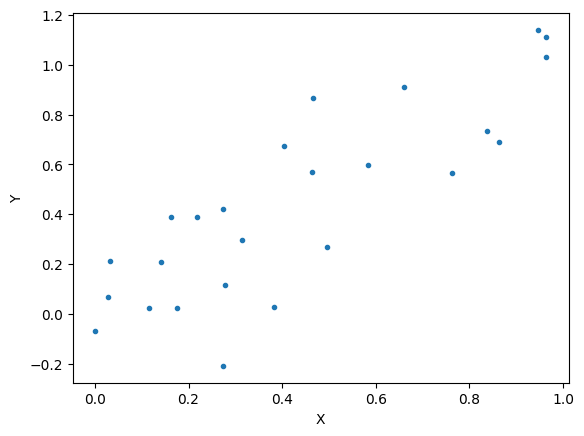

In [69]:
# Create a simple dataset:
n_points = 25
x = np.random.uniform(size=n_points)
y = x + np.random.normal(loc = 0.0, scale = 0.25, size=n_points)
plt.plot(x,y, '.')
plt.xlabel('X')
plt.ylabel('Y')

Now we fit a regression model. To so first add a constant term to the x-array to take care of the intercept and then call the OLS function, which stands for Ordinary Least Squares:


In [70]:
x_fit = sm.add_constant(x)
x_fit

array([[1.00000000e+00, 4.04546524e-01],
       [1.00000000e+00, 9.81609357e-04],
       [1.00000000e+00, 8.63216118e-01],
       [1.00000000e+00, 9.62521970e-01],
       [1.00000000e+00, 1.62492692e-01],
       [1.00000000e+00, 4.95130559e-01],
       [1.00000000e+00, 2.77780496e-01],
       [1.00000000e+00, 6.59607850e-01],
       [1.00000000e+00, 3.81627464e-01],
       [1.00000000e+00, 2.75806121e-02],
       [1.00000000e+00, 4.65110825e-01],
       [1.00000000e+00, 9.64049120e-01],
       [1.00000000e+00, 7.62555755e-01],
       [1.00000000e+00, 3.17779542e-02],
       [1.00000000e+00, 5.83944785e-01],
       [1.00000000e+00, 8.38396990e-01],
       [1.00000000e+00, 2.18619419e-01],
       [1.00000000e+00, 1.16125633e-01],
       [1.00000000e+00, 1.42216868e-01],
       [1.00000000e+00, 4.63102514e-01],
       [1.00000000e+00, 9.46051214e-01],
       [1.00000000e+00, 2.73516361e-01],
       [1.00000000e+00, 1.75508214e-01],
       [1.00000000e+00, 3.13702632e-01],
       [1.000000

In [71]:
linear_fit = sm.OLS(y,x_fit).fit()

We can display a lot of useful information about the fit by printing out the summary:

In [72]:
print(linear_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     54.00
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.78e-07
Time:                        08:10:39   Log-Likelihood:                 4.0107
No. Observations:                  25   AIC:                            -4.021
Df Residuals:                      23   BIC:                            -1.584
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.074     -0.051      0.9

To understand this output we start in with the right column at top and highlight a few of the outputs:
- R-squared is the square of the correlation between x and y, and represents the fraction of the variance in y that can be predicted from x
- Adj. R-squared is a modified version of R-squared that accounts for the number of independent variables being used. R-squared will always go up with more independent variables; Adjusted R-squared will not
- Prob (F-statistic) is a measure of whether the fit is significant. That is, does knowing x tell you something about y.



The middle row is also important to understand. It shows the 
- $\beta$ coefficients for the constant (intercept) and x values, 
- the standard errors, which represent the standard deviation of the distribution for the estimate
- the P values representing the probability that the $\beta$ coefficient is not zero and
- the 95% confidence bounds for value of the $\beta$ coefficient


In this case, the $\beta$ for the intercept is not significantly different than 0, but the $\beta$ for x is, indicating that x is a significant predictor of y.

We often want to plot the best fit line on top of the data. 

We could of course  plot the equation of the line $y = \beta_{0} + \beta_{1} X$

But, since we have a model, we can use that to predict values and plot those predictions as the y's instead:

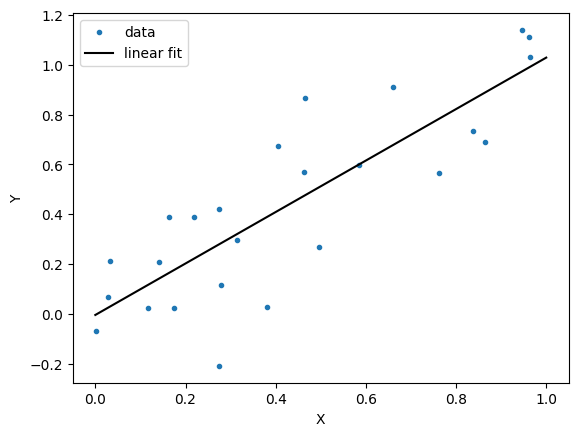

In [80]:
tmp_x = np.linspace(0, 1, 100)
tmp_x = sm.add_constant(tmp_x)
tmp_y = linear_fit.predict(tmp_x)
plt.plot(x,y, '.', label='data')
ax = plt.gca()
ax.plot(tmp_x[:,1], tmp_y, 'k', label='linear fit')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend()

Text(0, 0.5, 'Count')

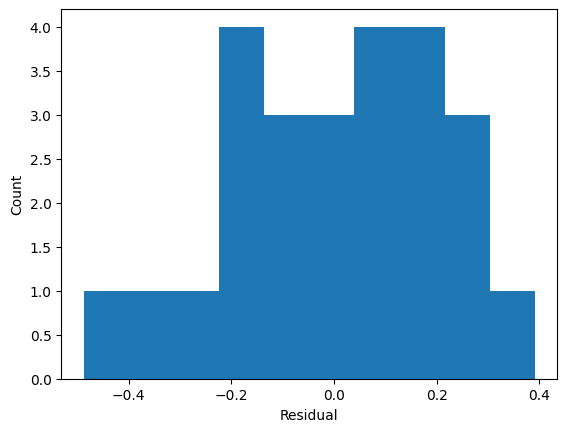

In [81]:
residuals = y - linear_fit.predict(x_fit)
plt.hist(residuals)
plt.xlabel('Residual')
plt.ylabel('Count')

#### non-normal residuals

Now let's look at what happens when the residuals are not normal:

In [82]:
n_data_points_XY = 50
# define the mu and sigmas for our X distribution :
mu_x = 10
sigma_x = 10
# for variety, we'll use a log normal distribution for the variabilty of Y around X
mu_y = 1.6
sigma_y = 1.5
# Create a set of simulated X data drawn from a Gaussian distribution
X = np.random.normal(loc=mu_x, scale=sigma_x, size=n_data_points_XY)
# simulate the Y data as variability around the X data
Y = X + np.random.lognormal(mean=mu_y, sigma=sigma_y, size=n_data_points_XY)

Text(0, 0.5, 'Y')

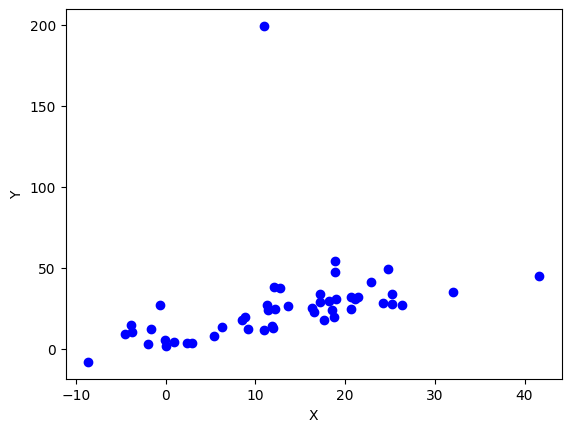

In [83]:
plt.plot(X,Y, 'bo')
plt.xlabel('X')
plt.ylabel('Y')

In [84]:
X_fit = sm.add_constant(X)


In [85]:
linear_fit = sm.OLS(Y,X_fit).fit()

We can display a lot of useful information about the fit by printing out the summary:

In [86]:
print(linear_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.582
Date:                Thu, 30 Jan 2025   Prob (F-statistic):             0.0135
Time:                        08:13:25   Log-Likelihood:                -234.60
No. Observations:                  50   AIC:                             473.2
Df Residuals:                      48   BIC:                             477.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0522      6.065      2.317      0.0

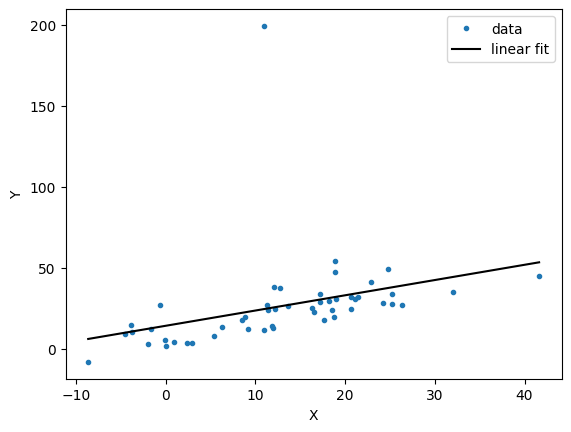

In [87]:
tmp_X = np.linspace(np.min(X), np.max(X), 100)
tmp_X = sm.add_constant(tmp_X)
tmp_Y = linear_fit.predict(tmp_X)
plt.plot(X,Y, '.', label='data')
ax = plt.gca()
ax.plot(tmp_X[:,1], tmp_Y, 'k', label='linear fit')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend()

Text(0, 0.5, 'Count')

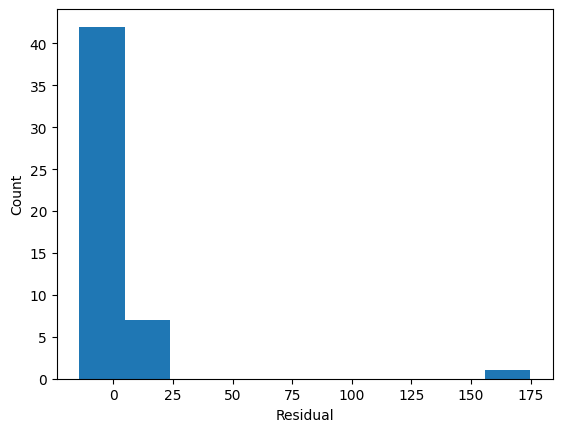

In [89]:
residuals = Y - linear_fit.predict(X_fit)
plt.hist(residuals)
plt.xlabel('Residual')
plt.ylabel('Count')

These residuals are very non-normal, suggesting that a linear fit is not a good model here. Also note the Omnibus, skewness, and kurtosis values in the summary.

We can now go on to try to develop some intuition for these models. Let's try adding ten additional columns $x_{i}$ that are unrelated to y. This is conceptually similar to the case where you measure many variables, and some of them are not related to the one you are trying to predict.

In [17]:
#create an empty array for the x predictors and the column of ones 
x2_fit = np.zeros((n_points, 12))
# carry over the first two colums from x_fit
x2_fit[:, 0:2] = x_fit
for i in range(2, 12):
    #generate some random values
    tmp = np.random.uniform(size=n_points)
    # add those values on to x
    x2_fit[:,i] = tmp
    
linear_fit2 = sm.OLS(y,x2_fit).fit()


In [18]:
print(linear_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     4.101
Date:                Wed, 29 Jan 2025   Prob (F-statistic):            0.00924
Time:                        09:29:22   Log-Likelihood:                 7.3414
No. Observations:                  25   AIC:                             9.317
Df Residuals:                      13   BIC:                             23.94
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4825      0.380     -1.268      0.2

While the results will vary based on the specific random numbers generated, this fit is probably quite a lot "better" based on the R-squared value, although the Adjusted R-squared is probably similar. 

You might also see that more than one of the $\beta_{i}$ values is "significant" or close to it.
This should worry you, as if this happens in a real experiment, it would lead to an incorrect conclusion.

There are multiple approaches to dealing with this sort of problem, but one of the best is to use cross-validation, where you do the fit based on part of the data and the test it based on the rest of the data. The model with the lowest cross-validated error is the best.

#### Cross-validation for model selection

A standard way to cross-validate is to fit the model based on part of the data and then test on the remainder. If you have many data points, you might split the data into fifths, train with four fifths, and test with the remaining fifth. In this case we only have 25 points, so we'll train with 24 and test with the remaining point.

We also have to choose an error function. Standard options include the squared error (which we'll use here) and the absolute value of the error. 

For simplicity, we will compare the original model with a single x predictor to the new model with 11 predictors

In [9]:
error_1_predictor = 0
# create a list of the indexes so we can exclude them one at a time
point_ind = np.arange(n_points)
for point in range(n_points):
    # remove the current point from x_fit to make x_tmp
    x_tmp = x_fit[point_ind!=point, :]
    # do the same for y
    y_tmp = y[point_ind!=point]
    # fit the data
    linear_fit_tmp = sm.OLS(y_tmp,x_tmp).fit()
    # add the distance between the data and the predicted value to the error
    error_1_predictor += np.square(y[point]-linear_fit_tmp.predict(x_fit[point]))
                                               

In [10]:
error_11_predictors = 0
point_ind = np.arange(n_points)
for point in range(n_points):
    x_tmp = x2_fit[point_ind!=point, :]
    y_tmp = y[point_ind!=point]
    linear_fit_tmp = sm.OLS(y_tmp,x_tmp).fit()
    error_11_predictors += np.square(y[point] - linear_fit_tmp.predict(x2_fit[point]))

In [11]:
print(f'Errors with 1 vs. 11 predictors: {error_1_predictor}, {error_11_predictors}')

Errors with 1 vs. 11 predictors: [2.39154934], [4.68537303]


This indicates that the model with just the first x is a much better fit, as we would expect.

### Non-linear regression

The actual relationship among a set of variables is often not well described as linear or may not fit the assumptions of a linear model. In this case there are two reasonable options:

1. Transform the independent or dependent variables to make the relationship more linear or the assuptions met. 
    1. Transformation possibilities:
        1. $ newy = \log(y) $ (useful for lognormally distributed data)
        2. $ newy = sqrt(y) $ (useful for count data, which may be from a Poisson distribution)
    2. Remember that the domain of these functions is x > 0, so they can only be used for positive data values. 
    3. Also remember to take the transformation into account when making predictions, etc.


2. Fit a non-linear function.
    1. Possible functions include
        1. $y = a + bx + cx^2 + ... $ (polynomial)  
            Note that this is a special case where you can use linear fitting where you feed in the values of $x, x^2, $ etc. and use OLS to fit the parameters just as you would for multiple linear regression.
        2. $y= ae^{-bx} $ (exponential)
        3. $y = \log(a + bx) $ (logrithmic)
        4. $y = \large\frac{1}{1 + exp(-bx)} $ (sigmoid)
        5. $y = A\sin(bx+c) $
          


For the non-polynomial cases (2-5, and the many other possible equations), the fitting procedure is as follows:
1. Define a function that returns the y value given an input x and the parameters a, b, ...
2. Make a reasonable guess for initial values of the parameters.
3. Use scipy.optimize.curve_fit to estimate the best values for the parameters. See, for example, https://medium.com/analytics-vidhya/non-linear-regression-analysis-e150447ac1a3

### Generalized Linear Models

Generalized linear models offer a powerful tool for situations where the dependent variable $y$ is not continuous or normally distributed. Examples of these situations include
1. Event outcomes (e.g. correct or incorrect trials / presence or absence of a spike)
2. Event counts (e.g number of spikes in a window)

General form:  
$$ \large{f(y) = \beta_{0} + \sum_{i=1}^n \beta_{i}x_{i}} $$



Specific versions:
1. Logistic regression
    1. Outcome variable y is 0 or 1
    2. Uses logit function:  
    $ \large\log(\frac{y}{1-y}) = \beta_{0} + \sum_{i=1}^n \beta_{i}x_{i} $
    3. Maps outcomes (0 or 1) to full real number line
    4. Can also be used for Multinomial regression, where outcomes of each trial is one of K possibilities
2. Poisson regression
    1. Outcome variable is an event count  
    $ \large\log(y) = \beta_{0} + \sum_{i=1}^n \beta_{i}x_{i} $

A simple example of logistic regression:

In [105]:
# Let's simulate a learning curve for an animal across 100 trials:
import scipy.stats as st
n_trials = 100
trials = np.arange(0, n_trials)

# define a sigmoidal probability curve for correct responses across trials
p = 1 / (1 + np.exp(-(trials-50)/15))
trial_outcome = np.zeros(n_trials)

for i in trials:
    outcome = st.bernoulli(p[i])
    trial_outcome[i] = outcome.rvs()


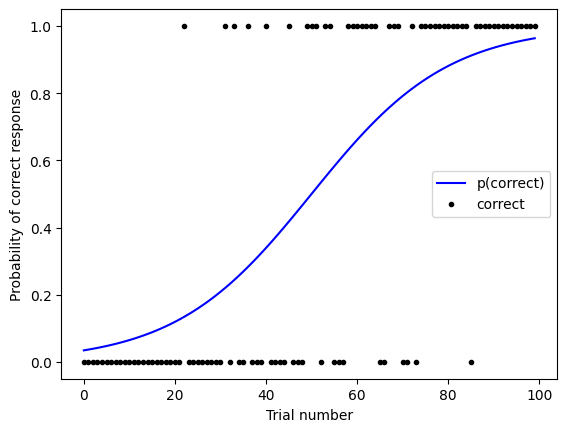

In [106]:
# Now let's plot the underlying curve and the data we generated to make sure it makes sense
plt.plot(trials, p, 'b', label='p(correct)')
plt.plot(trials, trial_outcome, 'k.', label='correct')
plt.xlabel('Trial number')
plt.ylabel('Probability of correct response')
plt.legend()

Now we can use a logistic regression to determine whether there is a significant effect of trial number on outcome.

Here we will introduce two useful approaches: pandas to represent data and the statsmodels forumla api to specify the model:

In [40]:
import statsmodels.formula.api as smf
import pandas as pd

# create a panda's dataframe
df = pd.DataFrame()
# create two labeled columns, one for trial_outcome and the other for trial
df['trial_outcome'] = trial_outcome
df['trial'] = trials

#let's first look at the dataframe we created
df


,trial_outcome,trial
0,0.0,0
1,0.0,1
2,0.0,2
3,0.0,3
4,0.0,4
...,...,...
95,1.0,95
96,1.0,96
97,1.0,97
98,1.0,98


In [109]:
# and just for dataframe demonstration purposes:
df['trials_to_last'] = 99 - df['trial']
df

,trial_outcome,trial,trials_to_last
0,0.0,0,99
1,0.0,1,98
2,0.0,2,97
3,0.0,3,96
4,0.0,4,95
...,...,...,...
95,1.0,95,4
96,1.0,96,3
97,1.0,97,2
98,1.0,98,1


In [42]:

# specify that we want to predict trial_outcome from trial and use the data in df for our logistic regression:
test_model = smf.logit("trial_outcome ~ trial", data=df).fit()
test_model.summary()

# Note that if we wanted to add additional variables to the model, we would do something like 
# test_model = smf.logit("trial_outcome ~ trial + new_variable", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.436006
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          trial_outcome   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.3702
Time:                        09:41:11   Log-Likelihood:                -43.601
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 8.057e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4536      0.692     -4.989      0.000      -4.810      -2.097
trial          0.0669      0.012      5.358      0.000       0.042       0.091
==============================================================================
"""

The results indicate that the coefficient for trial is significant, implying that trial number is a significant predictor of outcome, and thus that there was learning.

We can also make predictions from this model to get a sense for how closely it approximates the actual underlying probability of correct responses:

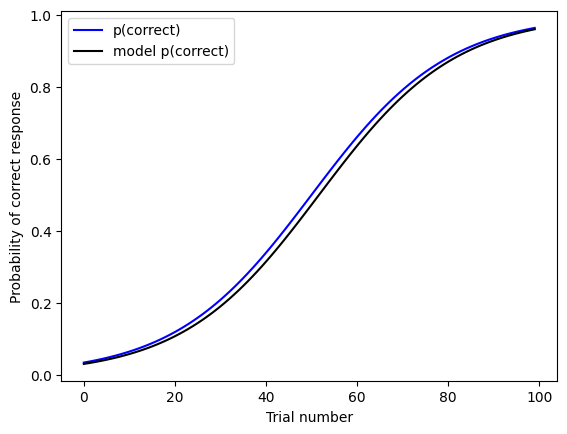

In [43]:
outcome_pred = test_model.predict()
plt.plot(trials, p, 'b', label='p(correct)')
plt.plot(trials, outcome_pred, 'k', label='model p(correct)')
plt.xlabel('Trial number')
plt.ylabel('Probability of correct response')
plt.legend()

The model should be close to the real curve, but due to the randomness in the data, it won't overlap perfectly. 